In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import re
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv('./result/data.csv', sep=',')

## try1

In [4]:
df.columns

Index(['자치구', '카페 개수', '한식점 개수', '실종 아동 신고 건수', '대규모점포', '유원시설', '시군구코드',
       'day', '총생활인구수', '10세미만생활인구', '공원개수', '영유아가족_소비건수', '인구'],
      dtype='object')

In [5]:
df = df[['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '시군구코드',
       'day', '총생활인구수', '10세미만생활인구', '공원개수', '영유아가족_소비건수', '인구', '실종 아동 신고 건수']]

In [6]:
df_n = df.groupby(['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '실종 아동 신고 건수', '인구'])[['총생활인구수', '10세미만생활인구']].mean().reset_index()

In [7]:
df_n = df_n[['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '총생활인구수', '10세미만생활인구', '인구', '실종 아동 신고 건수']]

In [8]:
df_n[df_n.columns[1:]] = np.sqrt(df_n[df_n.columns[1:]])
df_n

,자치구,카페 개수,한식점 개수,대규모점포,유원시설,공원개수,영유아가족_소비건수,총생활인구수,10세미만생활인구,인구,실종 아동 신고 건수
0,강남구,48.836462,57.827329,1.000000,3.000000,11.575837,341.725036,190.731678,46.750454,733.535957,9.539392
1,강동구,28.071338,35.651087,2.236068,3.872983,8.602325,234.855275,166.700722,47.206268,684.103062,9.000000
2,강북구,17.972201,32.171416,2.000000,3.464102,6.708204,177.129896,150.152588,37.991113,551.594960,8.485281
3,강서구,32.511536,40.211939,1.732051,4.690416,11.789826,304.251541,163.573006,45.301459,762.407371,9.055385
4,관악구,27.166155,35.171011,1.414214,2.645751,8.717798,211.886762,150.407217,33.761980,708.217481,11.874342
5,광진구,27.928480,31.320920,1.414214,3.162278,6.324555,223.017936,154.863420,38.637782,594.457736,9.055385
6,구로구,24.979992,33.030289,2.000000,3.316625,7.000000,235.656530,159.520676,43.951035,649.893068,10.000000
7,금천구,21.954498,27.892651,2.236068,2.828427,7.211103,190.049993,147.796234,33.286440,494.860586,12.165525
8,노원구,24.738634,29.799329,1.414214,3.464102,13.190906,247.151775,164.370673,46.113460,719.053545,8.246211
9,도봉구,19.390719,24.372115,1.414214,2.000000,8.426150,179.560575,139.963396,37.013436,566.313517,8.062258


<AxesSubplot:>

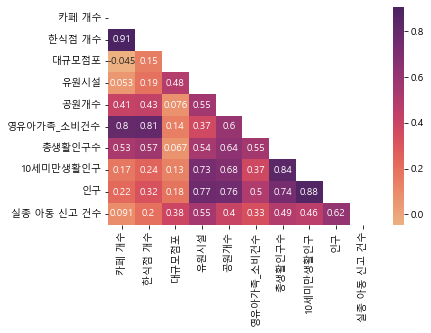

In [9]:
mask = np.zeros_like(df_n.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_n.corr(), annot=True, mask=mask, cmap='flare')

In [10]:
## 후진 소거법
variables = df_n.columns[1:-1].tolist() ## 설명 변수 리스트
 
y = df_n['실종 아동 신고 건수'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df_n[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_n[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
        model = sm.OLS(y,sm.add_constant(df_n[selected_variables])).fit()
        print(selected_variables)
        print(model.aic)
    else:
        break

['카페 개수', '한식점 개수', '대규모점포', '공원개수', '영유아가족_소비건수', '총생활인구수', '10세미만생활인구', '인구']
101.02289302843188
['카페 개수', '한식점 개수', '대규모점포', '영유아가족_소비건수', '총생활인구수', '10세미만생활인구', '인구']
99.06031578958573
['한식점 개수', '대규모점포', '영유아가족_소비건수', '총생활인구수', '10세미만생활인구', '인구']
97.82759290112877
['한식점 개수', '대규모점포', '총생활인구수', '10세미만생활인구', '인구']
96.08806345580689
['대규모점포', '총생활인구수', '10세미만생활인구', '인구']
98.96809325276531
['대규모점포', '10세미만생활인구', '인구']
99.41442088778086
['대규모점포', '인구']
98.47170088197056
['인구']
99.73938364756162


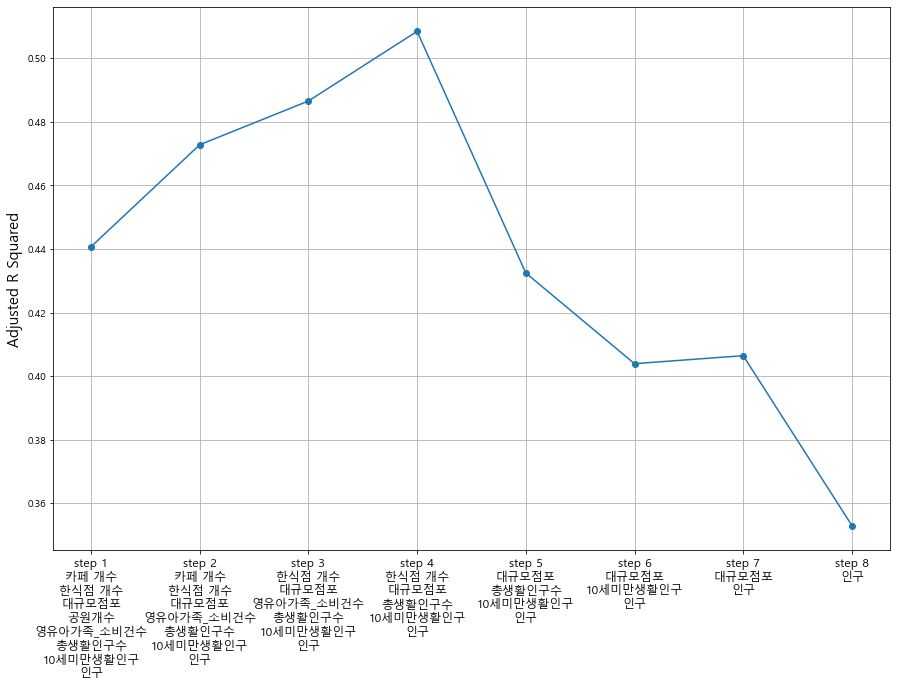

In [11]:
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

X = df_n[df_n.columns[1:-1]]
y = df_n[['실종 아동 신고 건수']]
scaler = MinMaxScaler()
df_n[df_n.columns[1:-1]] = scaler.fit_transform(X)

In [13]:
df_n

,자치구,카페 개수,한식점 개수,대규모점포,유원시설,공원개수,영유아가족_소비건수,총생활인구수,10세미만생활인구,인구,실종 아동 신고 건수
0,강남구,1.000000,1.000000,0.377964,0.484032,0.770146,0.931410,1.000000,0.981329,0.818817,9.539392
1,강동구,0.327211,0.337136,0.845154,0.750494,0.346960,0.326656,0.620641,1.000000,0.709509,9.000000
2,강북구,0.000000,0.233127,0.755929,0.625690,0.077391,0.000000,0.359408,0.622536,0.416500,8.485281
3,강서구,0.471074,0.473464,0.654654,1.000000,0.800600,0.719355,0.571266,0.921977,0.882659,9.055385
4,관악구,0.297884,0.322787,0.534522,0.375904,0.363394,0.196682,0.363428,0.449306,0.762832,11.874342
5,광진구,0.322583,0.207705,0.534522,0.533564,0.022791,0.259671,0.433775,0.649025,0.511281,9.055385
6,구로구,0.227052,0.258799,0.755929,0.580676,0.118919,0.331190,0.507295,0.866662,0.633862,10.000000
7,금천구,0.129026,0.105231,0.845154,0.431662,0.148963,0.073112,0.322210,0.429827,0.291047,12.165525
8,노원구,0.219232,0.162223,0.534522,0.625690,1.000000,0.396239,0.583859,0.955237,0.786793,8.246211
9,도봉구,0.045960,0.000000,0.534522,0.178800,0.321887,0.013755,0.198559,0.582490,0.449047,8.062258


In [14]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[df_n.columns[1:-1]])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              42.30
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.80e-09
Time:                        00:11:26   Log-Likelihood:                         -49.435
No. Observations:                  25   AIC:                                      116.9
Df Residuals:                      16   BIC:                                      127.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,23.620457
1,한식점 개수,26.525269
2,대규모점포,8.452923
3,유원시설,16.573160
4,공원개수,5.764195
5,영유아가족_소비건수,13.059249
6,총생활인구수,31.797046
7,10세미만생활인구,66.471140
8,인구,44.554217


In [17]:
df_n.columns

Index(['자치구', '카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수',
       '총생활인구수', '10세미만생활인구', '인구', '실종 아동 신고 건수'],
      dtype='object')

In [18]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['카페 개수', '한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수',
       '총생활인구수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              49.45
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    2.88e-10
Time:                        00:12:32   Log-Likelihood:                         -49.702
No. Observations:                  25   AIC:                                      115.4
Df Residuals:                      17   BIC:                                      125.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,카페 개수,23.150272
1,한식점 개수,24.148241
2,대규모점포,7.835193
3,유원시설,16.298374
4,공원개수,5.763336
5,영유아가족_소비건수,12.733792
6,총생활인구수,16.425194
7,인구,26.138142


In [28]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['한식점 개수', '대규모점포', '유원시설', '공원개수', '영유아가족_소비건수',
       '총생활인구수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              56.24
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    6.00e-11
Time:                        00:15:41   Log-Likelihood:                         -50.445
No. Observations:                  25   AIC:                                      114.9
Df Residuals:                      18   BIC:                                      123.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,한식점 개수,13.233862
1,대규모점포,7.819381
2,유원시설,15.214117
3,공원개수,5.754823
4,영유아가족_소비건수,10.992674
5,총생활인구수,15.301640
6,인구,26.138055


In [31]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['대규모점포', '유원시설', '공원개수', '영유아가족_소비건수', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              84.16
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    9.85e-13
Time:                        00:16:09   Log-Likelihood:                         -50.907
No. Observations:                  25   AIC:                                      111.8
Df Residuals:                      20   BIC:                                      117.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,6.578045
1,유원시설,14.130527
2,공원개수,5.725891
3,영유아가족_소비건수,4.446261
4,인구,17.698112


In [37]:
model = sm.OLS(df_n['실종 아동 신고 건수'], df_n[['대규모점포', '인구']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            실종 아동 신고 건수   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              210.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.67e-15
Time:                        00:17:12   Log-Likelihood:                         -52.582
No. Observations:                  25   AIC:                                      109.2
Df Residuals:                      23   BIC:                                      111.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,대규모점포,5.229687
1,공원개수,5.643306
2,영유아가족_소비건수,4.383650
3,인구,11.326134
